## Haytham Elghazel et Orhan Yazar

In [2]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

In /home/verdu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/verdu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/verdu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/verdu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/verdu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

# Partie 1
### 1. Chargement des données et préparation :

In [3]:
credit=pd.read_csv('./credit_scoring.csv',sep=";",header=0)

In [4]:
credit.head(3)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0


In [5]:
credit_arr = np.array(credit)
type(credit_arr)

numpy.ndarray

In [6]:
def print_hist(Yvalues) :
    nb_pos = 0
    nb_neg = 0
    for Y in Yvalues :
        if Y == 1 :
            nb_pos+=1
        else :
            nb_neg+=1
    fig = plt.figure()
    x = ['neg','pos']
    height = [nb_neg,nb_pos]
    width = 0.5
    plt.bar(x, height, width)
    plt.show()

(4375, 14)


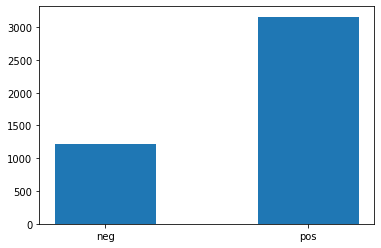

In [7]:
print(credit.shape)
print_hist(credit.Status)

In [8]:
X=credit.iloc[:,:13].values # the variable X contains the attributes
Y=credit.iloc[:,13].values # the variable Y contains the target variable

In [9]:
mp=100*np.sum(Y==0)/len(Y)
bp=100*np.sum(Y==1)/len(Y)

print("% Bon payeurs : {0:.2f} % Mauvais payeurs : {1:.2f}".format(bp,mp))

% Bon payeurs : 72.21 % Mauvais payeurs : 27.79


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier

In [11]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.5,random_state=1)
print(str(len(Ytest)))
print(str(len(Ytrain)))
#  we are splitting the dataset in a ratio of 50:50 between training and testing
# random_state variable is a pseudo-random number generator state used for random sampling

2188
2187


### 2. Apprentissage et évaluation de modèles : <br>
( scikit-learn.org ) The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.<br>
Dans notre cas on ne souhaite pas attribuer de crédit aux mauvais payeurs. Nous choisirons donc comme critère de comparaison pour nos classifieurs la précision.

In [12]:
from sklearn.metrics import precision_score

def classifieurs(Xtrain,Xtest,Ytrain,Ytest): 
    DT=DecisionTreeClassifier(criterion='gini',random_state=1) # Creating the classifier object CART
    DT.fit(Xtrain,Ytrain) # Performing training
    YDT=DT.predict(Xtest) # Predicton on test with giniIndex 
    
    prec_dt = precision_score(Ytest,YDT)   
    print("Arbre de décision : Accuracy = {0:.2f}".format(accuracy_score(Ytest,YDT)*100))
    print('Precision_DT : ' + str(prec_dt))
    print()

    KNN=KNeighborsClassifier(n_neighbors=5) #KNN
    KNN.fit(Xtrain,Ytrain)
    YKNN=KNN.predict(Xtest)

    prec_knn = precision_score(Ytest,YKNN)
    print("KNN : Accuracy = {0:.2f}".format(accuracy_score(Ytest,YKNN)*100))
    print('Precision_KNN : ' + str(prec_knn))
    print()

In [13]:
classifieurs(Xtrain,Xtest,Ytrain,Ytest)

Arbre de décision : Accuracy = 72.71
Precision_DT : 0.8194174757281554

KNN : Accuracy = 72.49
Precision_KNN : 0.7709713024282561



L'arbre de précision donne de meilleurs résultats sur ce jeu de données.

### 3. Normalisation des variables continues :

In [14]:
SS=StandardScaler()
SS.fit(Xtrain)
Xtrain_norm=SS.transform(Xtrain)
Xtest_norm=SS.transform(Xtest)

classifieurs(Xtrain_norm,Xtest_norm,Ytrain,Ytest) 

Arbre de décision : Accuracy = 72.71
Precision_DT : 0.8181818181818182

KNN : Accuracy = 75.27
Precision_KNN : 0.8106015485407981



Abre de décision : L'accuray et la precision restent stables. <br>
KNN : L'accuracy passe (d'environ) 72.5 à 75.3 et la précision de 0,77 à 0,81. <br>
KNN donne de meilleurs résultats sur ce jeu de données.

### 4. Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales :

In [15]:
pca=PCA(n_components=3)
pca.fit(Xtrain_norm)
Xtrain_pca=np.concatenate((Xtrain_norm,pca.transform(Xtrain_norm)),axis=1)
Xtest_pca=np.concatenate((Xtest_norm,pca.transform(Xtest_norm)),axis=1)
classifieurs(Xtrain_pca,Xtest_pca,Ytrain,Ytest)


Arbre de décision : Accuracy = 73.63
Precision_DT : 0.8327825512227363

KNN : Accuracy = 75.64
Precision_KNN : 0.8103957471943296



Abre de décision : L'accuracy passe (d'environ) 72.7 à 73.6 et la précision de 0,81 à 0,83. <br>
KNN : L'accuray et la precision restent stables. <br>
L'arbre de décision 

In [16]:
# Quelle partie ?
BAG=BaggingClassifier(n_estimators=100,random_state=1) #BAG
BAG.fit(Xtrain,Ytrain)
YBAG=BAG.predict(Xtest)
print("Bagging : Accuracy = {0:.2f}".format(accuracy_score(Ytest,YBAG)*100))
print(confusion_matrix(Ytest,YBAG))

Bagging : Accuracy = 78.56
[[ 332  272]
 [ 197 1387]]


### 5. Sélection de variables :

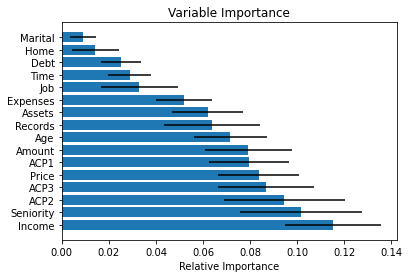

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100) # n_estimators number of trees in the forest.
clf.fit(Xtrain_pca, Ytrain) 
importances=clf.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0) # PAS TROP COMPRIS !!!
sorted_idx = np.argsort(importances)[::-1]

features = np.append(credit.columns.values[:-1], ['ACP1','ACP2','ACP3'])
sorted_importances = importances[sorted_idx]
sorted_features = features[sorted_idx]

padding = np.arange(Xtrain_pca.size/len(Xtrain_pca)) + 0.5
plt.barh(padding, sorted_importances,xerr=std[sorted_idx], align='center') # PAS TROP COMPRIS !!!
plt.yticks(padding, sorted_features)
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

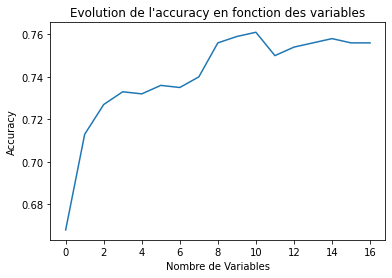

Nb varibles optimale : 10 à pour accuracy : 0.761
Variables retenues : 
['Income' 'Seniority' 'ACP2' 'ACP3' 'Price' 'ACP1' 'Amount' 'Age'
 'Records' 'Assets']


In [18]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(Xtrain_pca.shape[1]+1)
for f in np.arange(0, Xtrain_pca.shape[1]+1):
    X1_f = Xtrain_pca[:,sorted_idx[:f+1]]
    X2_f = Xtest_pca[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,Ytrain)
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(accuracy_score(Ytest,YKNN),3)

plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

best_nb_variables = np.argmax(scores)
print( "Nb varibles optimale : " + str(best_nb_variables) + " à pour accuracy : " + str(np.amax(scores))) # peut etre afficher a liste
print("Variables retenues : \n" + str(sorted_features[:best_nb_variables]))

Xtrain_opt = Xtrain_pca[:,sorted_idx[:best_nb_variables]]
Xtest_opt = Xtest_pca[:,sorted_idx[:best_nb_variables]]

### 6. Paramétrage des classifieurs

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
params = {
    'n_neighbors' : [27],#list(range(1,100)),#[5,10, 25,43],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric' :['euclidean','manhattan']
    }
grid_kn = GridSearchCV(estimator = kn,
                        param_grid = params,
                        scoring = 'accuracy', #  evaluation metric that you want to use
                        cv = 5, # number of cross-validation you have to try for each selected set of hyperparameters
                        verbose = 1,
                        n_jobs = -1) # number of processes you wish to run in parallel for this task if it -1 it will use all available processors.
res = grid_kn.fit(Xtrain_norm, Ytrain) # Xtrain_opt !!!!
print("best score : " + str(res.best_score_))
print("best params : " + str(res.best_params_))
# best params : {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'distance'}

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
best score : 0.7782295225854988
best params : {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'distance'}
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.7s finished


Le meilleur score est obtenu avec les paramètres {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'distance'} .<br>
Sa valeur est de 0.7782295225854988. 

In [20]:
dt = DecisionTreeClassifier(random_state=1)
params = {
    'max_leaf_nodes': list(range(2, 100)), 
    'min_samples_split': [2, 3, 4]
    }
grid_dt = GridSearchCV(estimator = dt, 
                       param_grid = params,
                       verbose = 1, 
                       cv = 5, 
                       n_jobs = -1)
res = grid_dt.fit(Xtrain, Ytrain)
print("best score : " + str(res.best_score_))
print("best params : " + str(res.best_params_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
Fitting 5 folds for each of 294 candidates, totalling 1470 fits
best score : 0.7672570347846984
best params : {'max_leaf_nodes': 14, 'min_samples_split': 2}
[Parallel(n_jobs=-1)]: Done 1424 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1470 out of 1470 | elapsed:    1.7s finished


Le meilleur score est obtenu avec les paramètres {'max_leaf_nodes': 14, 'min_samples_split': 2} . <br>
Sa valeur est de 0.7672570347846984. 

### Création d’un pipeline

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
import pickle
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Reduce Dimension using PCA
## 3. Apply  Classifier

# featureUnion

def create_pipeline (classifier,pickle_filename) :
    pipeline = Pipeline([('ss',StandardScaler()),
                    ('FU',FeatureUnion([('ss',StandardScaler()),("pca", PCA(n_components=3))])),
                    ('classifieur',classifier)
                    ])
    with open(pickle_filename,'wb') as f :
        pickle.dump(pipeline,f)

def get_pipeline(pickle_filename) :
    with open(pickle_filename,'rb') as f :
        res =  pickle.load(f)
    return res

KNN=KNeighborsClassifier(n_neighbors=5)
#create_pipeline(KNN,'KNN')
pipeline_knn = get_pipeline('KNN')
#print(pipeline_knn)
pipeline_knn.fit(Xtrain,Ytrain)
print('Score pipeline_knn : ')
print(pipeline_knn.score(Xtest,Ytest))

dt = DecisionTreeClassifier(criterion='gini',random_state=1)
#create_pipeline(dt,'dt')
pipeline_dt = get_pipeline('dt')
#print(pipeline_dt)
pipeline_dt.fit(Xtrain,Ytrain)
print('Score pipeline_dt : ')
print(pipeline_dt.score(Xtest,Ytest))


Score pipeline_knn : 
0.756398537477148
Score pipeline_dt : 
0.7362888482632541


In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import time

clfs = {
'GNB' : GaussianNB(),
'CART' : DecisionTreeClassifier(criterion='gini',random_state=1),
'ID3' : DecisionTreeClassifier(criterion='entropy',random_state=1),
'STUMP' : DecisionTreeClassifier(max_depth=1,random_state=1),
'MPL' : MLPClassifier(hidden_layer_sizes=(20,10), random_state=1),
'KNN': KNeighborsClassifier(n_neighbors=5),
'BAG' : BaggingClassifier(n_estimators=50,random_state=1),
'ADB' : AdaBoostClassifier(n_estimators=50),
'RF': RandomForestClassifier(n_estimators=50, random_state=1)
}

def run_classifiers(X,Y,classif): 
    kf1 = KFold(n_splits=10, shuffle=True, random_state=0)
    kf2 = KFold(n_splits=5, shuffle=True, random_state=0)
    for i in clfs:
        clf = clfs[i]
        start_time = time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf1, n_jobs = -1)
        cv_auc = cross_val_score(clf, X, Y, cv=kf1, scoring='roc_auc', n_jobs = -1)
        cv_rec = cross_val_score(clf, X, Y, cv=kf2,scoring='precision', n_jobs = -1) 
        elapsed_time = time.time() - start_time
        print("{0}".format(i))
        print(" precision : {0:.3f} +/- {1:.3f}".format(np.mean(cv_rec), np.std(cv_rec)))
        print(" AUC : {0:.3f} +/- {1:.3f}".format(np.mean(cv_auc), np.std(cv_auc)))
        print(" Accuracy : {0:.3f} +/- {1:.3f}".format(np.mean(cv_acc), np.std(cv_acc)))
        print(" Elapsed time : {0:.3f}".format(elapsed_time))
        print()

run_classifiers(Xtest_opt,Ytest,clfs)

GNB
 precision : 0.852 +/- 0.015
 AUC : 0.764 +/- 0.023
 Accuracy : 0.709 +/- 0.028
 Elapsed time : 0.054

CART
 precision : 0.795 +/- 0.016
 AUC : 0.651 +/- 0.032
 Accuracy : 0.711 +/- 0.027
 Elapsed time : 0.087

ID3
 precision : 0.797 +/- 0.016
 AUC : 0.641 +/- 0.031
 Accuracy : 0.706 +/- 0.023
 Elapsed time : 0.126

STUMP
 precision : 0.752 +/- 0.021
 AUC : 0.612 +/- 0.037
 Accuracy : 0.715 +/- 0.023
 Elapsed time : 0.052

MPL
 precision : 0.826 +/- 0.011
 AUC : 0.828 +/- 0.020
 Accuracy : 0.794 +/- 0.017
 Elapsed time : 7.225

KNN
 precision : 0.809 +/- 0.013
 AUC : 0.764 +/- 0.031
 Accuracy : 0.766 +/- 0.021
 Elapsed time : 0.183

BAG
 precision : 0.820 +/- 0.020
 AUC : 0.799 +/- 0.027
 Accuracy : 0.772 +/- 0.028
 Elapsed time : 2.491

ADB
 precision : 0.818 +/- 0.010
 AUC : 0.815 +/- 0.024
 Accuracy : 0.787 +/- 0.018
 Elapsed time : 0.906

RF
 precision : 0.812 +/- 0.012
 AUC : 0.805 +/- 0.018
 Accuracy : 0.782 +/- 0.022
 Elapsed time : 1.159



Si l'on souhaite maximiser la precision le classifieur optimal sera : NaiveBayesSimple. <br>
Si l'on souhaite maximiser l'accuracy le classifieur optimal sera : MultilayerPerceptron. <br>

# Partie 2
### 1. Chargement des données et préparation :

In [23]:
credit_scoring = pd.read_csv('./credit.data',sep='\t',header=None)
credit_scoring.head(3)
credit_scoring.shape

(688, 16)

X_credit_scoring_num.shape : (666, 6)


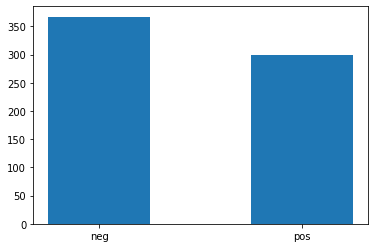

In [24]:
X_credit_scoring_tmp1 = credit_scoring.iloc[:,:15].values # the variable X contains the attributes
Y_credit_scoring_tmp1 = credit_scoring.iloc[:,15:].values # the variable Y contains the target variable
X_credit_scoring_num_tmp2 = credit_scoring.iloc[:,[1,2,7,10,13,14]]
X_credit_scoring_num_tmp3 = X_credit_scoring_num_tmp2.replace('?',np.nan)
X_credit_scoring_num_tmp4 = X_credit_scoring_num_tmp3.astype(float)
X_credit_scoring_num = X_credit_scoring_num_tmp4[~np.isnan(X_credit_scoring_num_tmp4).any(axis=1)]
Y_credit_scoring_tmp2 = Y_credit_scoring_tmp1[~np.isnan(X_credit_scoring_num_tmp4).any(axis=1)]
Y_credit_scoring = np.where(Y_credit_scoring_tmp2=='+',1, 0)

print('X_credit_scoring_num.shape : ' + str(X_credit_scoring_num.shape))
print_hist(Y_credit_scoring)




In [25]:
run_classifiers(X_credit_scoring_num,Y_credit_scoring,clfs)

GNB
 precision : 0.819 +/- 0.026
 AUC : 0.793 +/- 0.058
 Accuracy : 0.716 +/- 0.050
 Elapsed time : 0.126

CART
 precision : 0.703 +/- 0.043
 AUC : 0.711 +/- 0.051
 Accuracy : 0.716 +/- 0.047
 Elapsed time : 0.150

ID3
 precision : 0.734 +/- 0.048
 AUC : 0.734 +/- 0.045
 Accuracy : 0.739 +/- 0.038
 Elapsed time : 0.173

STUMP
 precision : 0.861 +/- 0.064
 AUC : 0.723 +/- 0.052
 Accuracy : 0.743 +/- 0.064
 Elapsed time : 0.111

MPL
 precision : 0.642 +/- 0.070
 AUC : 0.724 +/- 0.064
 Accuracy : 0.694 +/- 0.055
 Elapsed time : 3.057

KNN
 precision : 0.708 +/- 0.041
 AUC : 0.733 +/- 0.047
 Accuracy : 0.709 +/- 0.039
 Elapsed time : 0.153

BAG
 precision : 0.783 +/- 0.047
 AUC : 0.834 +/- 0.047
 Accuracy : 0.787 +/- 0.040
 Elapsed time : 2.773

ADB
 precision : 0.790 +/- 0.053
 AUC : 0.841 +/- 0.053
 Accuracy : 0.770 +/- 0.063
 Elapsed time : 1.899

RF
 precision : 0.803 +/- 0.034
 AUC : 0.841 +/- 0.046
 Accuracy : 0.788 +/- 0.053
 Elapsed time : 1.893



Si l'on souhaite maximiser la precision le classifieur optimal sera : Decision Stump. <br>
Si l'on souhaite maximiser l'accuracy le classifieur optimal sera : Random Forest. <br>
Si l'on souhaite maximiser l'AUC le classifieur optimal sera : Random Forest ou AdaBoost. 

### 2. Normalisation des variables continues :

In [26]:
SS2 = StandardScaler()
SS2.fit(X_credit_scoring_num)
X_credit_scoring_num_norm = SS2.transform(X_credit_scoring_num)
run_classifiers(X_credit_scoring_num_norm,Y_credit_scoring,clfs)

GNB
 precision : 0.819 +/- 0.026
 AUC : 0.793 +/- 0.058
 Accuracy : 0.716 +/- 0.050
 Elapsed time : 0.044

CART
 precision : 0.706 +/- 0.042
 AUC : 0.711 +/- 0.052
 Accuracy : 0.716 +/- 0.048
 Elapsed time : 0.077

ID3
 precision : 0.734 +/- 0.048
 AUC : 0.734 +/- 0.045
 Accuracy : 0.739 +/- 0.038
 Elapsed time : 0.108

STUMP
 precision : 0.861 +/- 0.064
 AUC : 0.723 +/- 0.052
 Accuracy : 0.743 +/- 0.064
 Elapsed time : 0.046

MPL
 precision : 0.796 +/- 0.042
 AUC : 0.839 +/- 0.044
 Accuracy : 0.776 +/- 0.034
 Elapsed time : 8.190

KNN
 precision : 0.777 +/- 0.053
 AUC : 0.808 +/- 0.049
 Accuracy : 0.745 +/- 0.062
 Elapsed time : 0.094

BAG
 precision : 0.790 +/- 0.059
 AUC : 0.834 +/- 0.048
 Accuracy : 0.785 +/- 0.040
 Elapsed time : 2.702

ADB
 precision : 0.790 +/- 0.053
 AUC : 0.841 +/- 0.053
 Accuracy : 0.770 +/- 0.063
 Elapsed time : 1.831

RF
 precision : 0.806 +/- 0.040
 AUC : 0.841 +/- 0.046
 Accuracy : 0.790 +/- 0.050
 Elapsed time : 1.820



Si l'on souhaite maximiser la precision le classifieur optimal sera : Decision Stump. <br>
Si l'on souhaite maximiser l'accuracy le classifieur optimal sera : Random Forest. <br>
Si l'on souhaite maximiser l'AUC le classifieur optimal sera : Random Forest ou AdaBoost. 

### 2. Traitement de données manquantes  + Traitement de variables catégorielles :

In [27]:
# variables catégorielles
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
X_scoring_bis = credit_scoring.iloc[:,:15].values  
col_cat=np.array([0,3,4,5,6,8,9,11,12])
X_cat = np.copy(X_scoring_bis[:,col_cat])
for col_id in range(len(col_cat)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx
imp_cat = SimpleImputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])
X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()

In [28]:
# variables numériques
col_num = np.array([1,2,7,10,13,14])
X_num = np.copy(X_scoring_bis[:, col_num])
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)
print(X_num.shape)

(688, 6)


### 3. Construction de votre jeu de données :

In [29]:
SS_num = StandardScaler()
SS_num.fit(X_num)
X_num_norm = SS_num.transform(X_num)
X_num_cat = np.concatenate((X_cat_bin,X_num_norm), axis=1)

In [30]:
Y_scoring_bis = credit_scoring.iloc[:,15].values
Y_num_cat_bin = np.where(Y_scoring_bis=='+',1, 0)
run_classifiers(X_num_cat, Y_num_cat_bin,clfs)

GNB
 precision : 0.869 +/- 0.062
 AUC : 0.878 +/- 0.044
 Accuracy : 0.721 +/- 0.048
 Elapsed time : 0.054

CART
 precision : 0.779 +/- 0.075
 AUC : 0.832 +/- 0.039
 Accuracy : 0.831 +/- 0.038
 Elapsed time : 0.106

ID3
 precision : 0.789 +/- 0.037
 AUC : 0.811 +/- 0.046
 Accuracy : 0.814 +/- 0.046
 Elapsed time : 0.131

STUMP
 precision : 0.789 +/- 0.056
 AUC : 0.866 +/- 0.040
 Accuracy : 0.856 +/- 0.044
 Elapsed time : 0.050

MPL
 precision : 0.840 +/- 0.043
 AUC : 0.922 +/- 0.039
 Accuracy : 0.858 +/- 0.044
 Elapsed time : 10.478

KNN
 precision : 0.842 +/- 0.029
 AUC : 0.900 +/- 0.037
 Accuracy : 0.840 +/- 0.052
 Elapsed time : 0.197

BAG
 precision : 0.849 +/- 0.036
 AUC : 0.929 +/- 0.024
 Accuracy : 0.872 +/- 0.034
 Elapsed time : 3.427

ADB
 precision : 0.825 +/- 0.038
 AUC : 0.916 +/- 0.032
 Accuracy : 0.844 +/- 0.037
 Elapsed time : 2.088

RF
 precision : 0.847 +/- 0.045
 AUC : 0.929 +/- 0.023
 Accuracy : 0.879 +/- 0.042
 Elapsed time : 1.794



Si l'on souhaite maximiser la precision le classifieur optimal sera : Decision Stump. <br>
Si l'on souhaite maximiser l'accuracy le classifieur optimal sera : Random Forest. <br>
Si l'on souhaite maximiser l'AUC le classifieur optimal sera : Random Forest ou AdaBoost. 

# Partie 3
### 1. CountVectorizer :

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
spam = pd.read_csv('./SMSSpamCollection.data',sep='\t',header=None).to_numpy()
Y_spam = spam[:,0] # the variable Y contains the attributes
X_spam = spam[:,1]# the variable X contains the target variable
vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X_spam)
X_co = X_vec.T * X_vec
X_co = X_co.setdiag(0)
tmp = X_vec.sum(axis=0)
min_freq = 1
c = X_vec.toarray().sum(axis=0)
c = c > min_freq
Xtrain_freq = X_vec[:,c]
Y_spam_bin = np.where(Y_spam=='ham',1, 0)

In [33]:
run_classifiers(Xtrain_freq,Y_spam_bin,clfs)

GNB
 precision : nan +/- nan
 AUC : nan +/- nan
 Accuracy : nan +/- nan
 Elapsed time : 0.036

CART
 precision : 0.979 +/- 0.006
 AUC : 0.930 +/- 0.013
 Accuracy : 0.972 +/- 0.004
 Elapsed time : 3.529

ID3
 precision : 0.975 +/- 0.007
 AUC : 0.918 +/- 0.019
 Accuracy : 0.968 +/- 0.005
 Elapsed time : 3.614

STUMP
 precision : 0.890 +/- 0.011
 AUC : 0.599 +/- 0.022
 Accuracy : 0.891 +/- 0.012
 Elapsed time : 0.133

MPL
 precision : 0.985 +/- 0.003
 AUC : 0.979 +/- 0.010
 Accuracy : 0.986 +/- 0.003
 Elapsed time : 140.670

KNN
 precision : 0.913 +/- 0.012
 AUC : 0.849 +/- 0.033
 Accuracy : 0.919 +/- 0.014
 Elapsed time : 1.920

BAG
 precision : 0.979 +/- 0.006
 AUC : 0.987 +/- 0.004
 Accuracy : 0.976 +/- 0.006
 Elapsed time : 127.156

ADB
 precision : 0.971 +/- 0.003
 AUC : 0.964 +/- 0.009
 Accuracy : 0.970 +/- 0.006
 Elapsed time : 7.258

RF
 precision : 0.978 +/- 0.006
 AUC : 0.991 +/- 0.005
 Accuracy : 0.982 +/- 0.005
 Elapsed time : 15.081



Si l'on souhaite maximiser la precision le classifieur optimal sera : MultilayerPerceptron ( extremement chronophage ). <br>
Si l'on souhaite maximiser l'accuracy le classifieur optimal sera : MultilayerPerceptron ( extremement chronophage ). <br>
Si l'on souhaite maximiser l'AUC le classifieur optimal sera : . 

### 2. Tf–idf term weighting :

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X_tfidf = transformer.fit_transform(Xtrain_freq)

In [30]:
run_classifiers(X_tfidf,Y_spam_bin,clfs)

GNB
 precision : nan +/- nan
 AUC : nan +/- nan
 Accuracy : nan +/- nan
 Elapsed time : 0.072

CART
 precision : 0.976 +/- 0.005
 AUC : 0.915 +/- 0.016
 Accuracy : 0.967 +/- 0.006
 Elapsed time : 1.700

ID3
 precision : 0.973 +/- 0.005
 AUC : 0.909 +/- 0.028
 Accuracy : 0.966 +/- 0.009
 Elapsed time : 2.120

STUMP
 precision : 0.890 +/- 0.011
 AUC : 0.599 +/- 0.022
 Accuracy : 0.891 +/- 0.012
 Elapsed time : 0.084

MPL
 precision : 0.987 +/- 0.002
 AUC : 0.990 +/- 0.006
 Accuracy : 0.985 +/- 0.003
 Elapsed time : 69.805

KNN
 precision : 0.907 +/- 0.013
 AUC : 0.847 +/- 0.031
 Accuracy : 0.914 +/- 0.013
 Elapsed time : 0.708

BAG
 precision : 0.978 +/- 0.006
 AUC : 0.986 +/- 0.004
 Accuracy : 0.973 +/- 0.006
 Elapsed time : 67.310

ADB
 precision : 0.970 +/- 0.004
 AUC : 0.964 +/- 0.010
 Accuracy : 0.969 +/- 0.006
 Elapsed time : 4.222

RF
 precision : 0.979 +/- 0.005
 AUC : 0.991 +/- 0.004
 Accuracy : 0.982 +/- 0.005
 Elapsed time : 6.187



Si l'on souhaite maximiser la precision le classifieur optimal sera : MultilayerPerceptron ( extremement chronophage ). <br>
Si l'on souhaite maximiser l'accuracy le classifieur optimal sera : MultilayerPerceptron ( extremement chronophage ) . <br>
Si l'on souhaite maximiser l'AUC le classifieur optimal sera :  Random Forest. <br>
Ici on pourrai privilégier le Random Forest qui a de très bon résultats et qui a un temps d'exécution raisonnable.

### 3. TruncatedSVD

In [25]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
X_svd = SVD.fit_transform(X_tfidf)

In [32]:
run_classifiers(X_svd,Y_spam_bin,clfs)

GNB
 precision : 0.979 +/- 0.008
 AUC : 0.906 +/- 0.018
 Accuracy : 0.722 +/- 0.015
 Elapsed time : 0.519

CART
 precision : 0.975 +/- 0.005
 AUC : 0.903 +/- 0.015
 Accuracy : 0.951 +/- 0.006
 Elapsed time : 3.672

ID3
 precision : 0.975 +/- 0.008
 AUC : 0.909 +/- 0.013
 Accuracy : 0.954 +/- 0.006
 Elapsed time : 3.201

STUMP
 precision : 0.908 +/- 0.053
 AUC : 0.856 +/- 0.019
 Accuracy : 0.863 +/- 0.016
 Elapsed time : 1.003

MPL
 precision : 0.986 +/- 0.003
 AUC : 0.988 +/- 0.007
 Accuracy : 0.981 +/- 0.005
 Elapsed time : 32.573

KNN
 precision : 0.972 +/- 0.005
 AUC : 0.959 +/- 0.010
 Accuracy : 0.971 +/- 0.006
 Elapsed time : 6.952

BAG
 precision : 0.976 +/- 0.005
 AUC : 0.970 +/- 0.012
 Accuracy : 0.973 +/- 0.008
 Elapsed time : 141.034

ADB
 precision : 0.977 +/- 0.005
 AUC : 0.978 +/- 0.008
 Accuracy : 0.971 +/- 0.005
 Elapsed time : 25.545

RF
 precision : 0.972 +/- 0.006
 AUC : 0.976 +/- 0.009
 Accuracy : 0.974 +/- 0.008
 Elapsed time : 11.975



Si l'on souhaite maximiser la precision le classifieur optimal sera : MultilayerPerceptron ( extremement chronophage ). <br>
Si l'on souhaite maximiser l'accuracy le classifieur optimal sera : MultilayerPerceptron ( extremement chronophage ). <br>
Si l'on souhaite maximiser l'AUC le classifieur optimal sera :  MultilayerPerceptron ( extremement chronophage ).  <br>

### 4. Pipeline :

In [33]:
def pipe_vts(xtrain) :    
    pipe = Pipeline([('vectorizer', CountVectorizer(max_features = 300 ,stop_words='english')),('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=30, n_iter=7, random_state=42))])
    pipe_fit = pipe.fit(xtrain)
    X_pipe = pipe_fit.transform(xtrain)
    return X_pipe

In [34]:
X_pipe = pipe_vts(X_spam)
run_classifiers(X_pipe,Y_spam_bin,clfs)

GNB
 precision : 0.971 +/- 0.007
 AUC : 0.900 +/- 0.013
 Accuracy : 0.659 +/- 0.022
 Elapsed time : 0.319

CART
 precision : 0.972 +/- 0.009
 AUC : 0.901 +/- 0.026
 Accuracy : 0.957 +/- 0.008
 Elapsed time : 1.388

ID3
 precision : 0.976 +/- 0.009
 AUC : 0.906 +/- 0.026
 Accuracy : 0.958 +/- 0.009
 Elapsed time : 1.325

STUMP
 precision : 0.919 +/- 0.034
 AUC : 0.810 +/- 0.023
 Accuracy : 0.876 +/- 0.010
 Elapsed time : 0.649

MPL
 precision : 0.980 +/- 0.006
 AUC : 0.982 +/- 0.007
 Accuracy : 0.972 +/- 0.006
 Elapsed time : 26.047

KNN
 precision : 0.971 +/- 0.008
 AUC : 0.959 +/- 0.014
 Accuracy : 0.964 +/- 0.006
 Elapsed time : 1.537

BAG
 precision : 0.976 +/- 0.007
 AUC : 0.972 +/- 0.010
 Accuracy : 0.972 +/- 0.006
 Elapsed time : 32.227

ADB
 precision : 0.975 +/- 0.008
 AUC : 0.974 +/- 0.009
 Accuracy : 0.960 +/- 0.009
 Elapsed time : 7.328

RF
 precision : 0.977 +/- 0.006
 AUC : 0.978 +/- 0.007
 Accuracy : 0.972 +/- 0.008
 Elapsed time : 5.694



Si l'on souhaite maximiser la precision le classifieur optimal sera : MultilayerPerceptron ( extremement chronophage ). <br>
Si l'on souhaite maximiser l'accuracy le classifieur optimal sera : Random Forest, Bagging, MultilayerPerceptron ( extremement chronophage ). <br>
Si l'on souhaite maximiser l'AUC le classifieur optimal sera : MultilayerPerceptron ( extremement chronophage ). 

### 5. Application sur un autre jeu de données

In [37]:
yelp =  pd.read_csv("yelp-text-by-stars.csv",sep=';', header=0, encoding='ISO-8859-1').to_numpy()
X_yelp = yelp[:,1]
Y_yelp = yelp[:,0].astype(int)
X_yelp = yelp[:,1]
Y_yelp = yelp[:,0].astype(int)
X_train_yelp = pipe_vts(X_yelp)
Y_train_yelp = np.where(Y_yelp >= 4 ,1, 0)

In [38]:
run_classifiers(X_train_yelp,Y_train_yelp,clfs)

GNB
 precision : 0.819 +/- 0.003
 AUC : 0.787 +/- 0.008
 Accuracy : 0.725 +/- 0.007
 Elapsed time : 0.792

CART
 precision : 0.776 +/- 0.004
 AUC : 0.669 +/- 0.007
 Accuracy : 0.699 +/- 0.007
 Elapsed time : 13.538

ID3
 precision : 0.776 +/- 0.004
 AUC : 0.669 +/- 0.007
 Accuracy : 0.702 +/- 0.006
 Elapsed time : 28.566

STUMP
 precision : 0.659 +/- 0.003
 AUC : 0.617 +/- 0.006
 Accuracy : 0.659 +/- 0.005
 Elapsed time : 1.944

MPL
 precision : 0.824 +/- 0.011
 AUC : 0.872 +/- 0.004
 Accuracy : 0.803 +/- 0.006
 Elapsed time : 270.273

KNN
 precision : 0.805 +/- 0.004
 AUC : 0.784 +/- 0.007
 Accuracy : 0.736 +/- 0.008
 Elapsed time : 189.621

BAG
 precision : 0.811 +/- 0.005
 AUC : 0.840 +/- 0.006
 Accuracy : 0.783 +/- 0.005
 Elapsed time : 523.679

ADB
 precision : 0.811 +/- 0.004
 AUC : 0.841 +/- 0.005
 Accuracy : 0.775 +/- 0.005
 Elapsed time : 78.605

RF
 precision : 0.804 +/- 0.005
 AUC : 0.844 +/- 0.005
 Accuracy : 0.782 +/- 0.006
 Elapsed time : 89.312



Si l'on souhaite maximiser la precision le classifieur optimal sera : MultilayerPerceptron ( extremement chronophage ). <br>
Si l'on souhaite maximiser l'accuracy le classifieur optimal sera : MultilayerPerceptron ( extremement chronophage ). <br>
Si l'on souhaite maximiser l'AUC le classifieur optimal sera :  MultilayerPerceptron ( extremement chronophage ).